In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

from scipy.stats import norm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'P(F | IM = x)')

<Figure size 432x288 with 0 Axes>

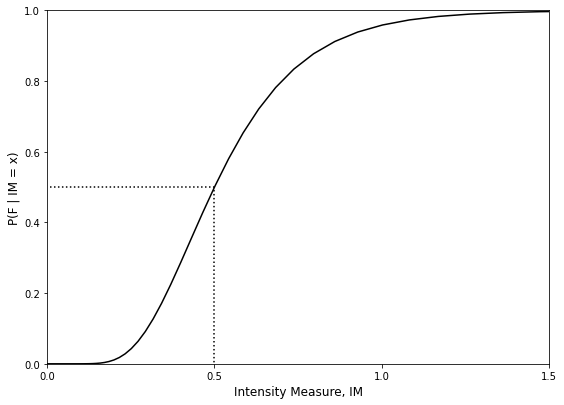

In [2]:
#######################################
### Fragility function illustration ###
#######################################

# parameters of the lognormal distribution
thetaIM = 0.5 # assumed fragility median (median of IM)
betaIM = 0.4 # assumed fragility beta (standard deviation of lnIM)

# IM values to consider
x = list(np.logspace(-3, np.log10(2), num=100))
x.append(2.1)

# fragility function
pFail = norm.cdf(np.log(x), np.log(thetaIM), betaIM)

# Plot Fig 9.1
plt.figure(1)
plt.figure(figsize=(9, 6.5))
plt.plot(x, pFail, 'k-', [0.01, thetaIM, thetaIM], [0.5, 0.5, 0], 'k:' )
plt.xlim(0, 1.5)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 2, step = 0.5))
plt.xlabel('Intensity Measure, IM', fontsize = 12)
plt.ylabel('P(F | IM = x)', fontsize = 12)
# plt.figure(figsize=(4.5, 3.25))
# plt.show()


<Figure size 432x288 with 0 Axes>

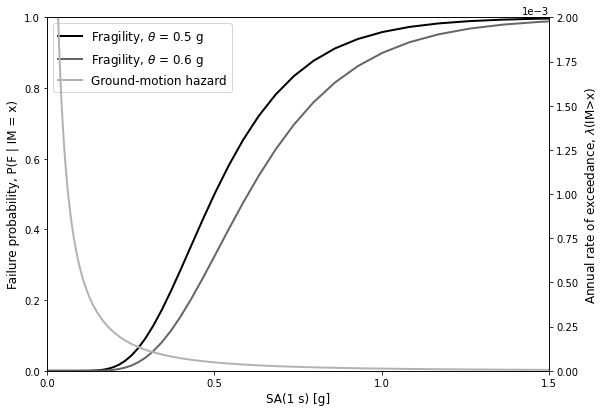

In [3]:
############################
### Failure rate example ###
############################

# mean hazard from simplified logic tree (ch6/PSHA_calc_w_epistemic.m)
lambdaMean = [0.0251694954594308,0.0243005973346253,0.0234365472558623,0.0225792462468511,0.0217305158448367,0.0208920837822666,0.0200655715142511,0.0192524837495085,0.0184542000865126,0.0176719688005284,0.0169069027730509,0.0161599775046000,0.0154320311063565,0.0147237661269249,0.0140357530384293,0.0133684351816874,0.0127221349535275,0.0120970610102702,0.0114933162595579,0.0109109064174252,0.0103497489179256,0.00980968197780037,0.00929047363756543,0.00879183062195665,0.00831340688589137,0.00785481173602961,0.00741561744179956,0.00699536627266170,0.00659357691982798,0.00620975028017252,0.00584337459734840,0.00549392996997187,0.00516089224907525,0.00484373635688936,0.00454193906650127,0.00425498128721521,0.00398234990373885,0.00372353921886845,0.00347805204941328,0.00324540052394014,0.00302510662878499,0.00281670254590154,0.00261973082270939,0.00243374441035183,0.00225830660283430,0.00209299090552312,0.00193738085754465,0.00179106982882404,0.00165366080890037,0.00152476620129790,0.00140400763414932,0.00129101579497441,0.00118543029502282,0.00108689956639214,0.000995080793225799,0.000909639876668399,0.000830251431896055,0.000756598814428752,0.000688374172055584,0.000625278518042679,0.000567021820830418,0.000513323105142555,0.000463910559307276,0.000418521643610899,0.000376903194651442,0.000338811520914285,0.000304012485139082,0.000272281569469359,0.000243403919858480,0.000217174366732617,0.000193397419468867,0.000171887232821039,0.000152467544004570,0.000134971579723542,0.000119241932976582,0.000105130410005028,9.24978482376873e-05,8.12139065351012e-05,7.11568294363794e-05,6.22131874592354e-05,5.42775957953396e-05,4.72524139769621e-05,4.10474292661717e-05,3.55795266353024e-05,3.07723482686310e-05,2.65559455227739e-05,2.28664262410104e-05,1.96456002286791e-05,1.68406255681954e-05,1.44036582884222e-05,1.22915077099856e-05,1.04652995717140e-05,8.89014880956513e-06,7.53484361431181e-06,6.37154214337735e-06,5.37548301094735e-06,4.52471043365022e-06,3.79981467097529e-06,3.18368817390031e-06,2.66129764494389e-06, 10e-10]
# pick a hazard curve to use
lambdaIM = lambdaMean

dLambda =  np.abs(np.diff(lambdaIM + [0]))  # derivative of hazard curve
failContrib = pFail * dLambda
failRate = np.sum(failContrib)

# second fragility
thetaIM2 = thetaIM * 1.2;
pFail2 = norm.cdf(np.log(x), np.log(thetaIM2), betaIM)
failRate2 = np. sum(pFail2 * dLambda)
failRateRatio = failRate2 / failRate

# Plot Fig 9.7
plt.figure(2)
# plt.figure(figsize=(9, 6.5))
fig, ax1 = plt.subplots(figsize=(9, 6.5))
l1 = ax1.plot(x, pFail, '-k', linewidth=2, label=r'Fragility, $\theta$ = 0.5 g')
l2 = ax1.plot(x, pFail2, linestyle='-', linewidth=2, color=[0.4, 0.4, 0.4], label=r'Fragility, $\theta$ = 0.6 g')
ax1.set_xlabel('SA(1 s) [g]', fontsize = 12)
ax1.set_ylabel('Failure probability, P(F | IM = x)', fontsize = 12)
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
l3 = ax2.plot(x, lambdaIM, linestyle='-', linewidth=2, color=[0.7, 0.7, 0.7], label='Ground-motion hazard')
ax2.set_ylabel('Annual rate of exceedance, $\lambda$(IM>x)', fontsize = 12)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.set_ylim(0, 0.002)
plt.xlim(0, 1.5)
plt.xticks(np.arange(0, 2, step = 0.5))

# to show labels together
lns = l1 + l2 + l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize = 12)


(0.0, 8e-06)

<Figure size 432x288 with 0 Axes>

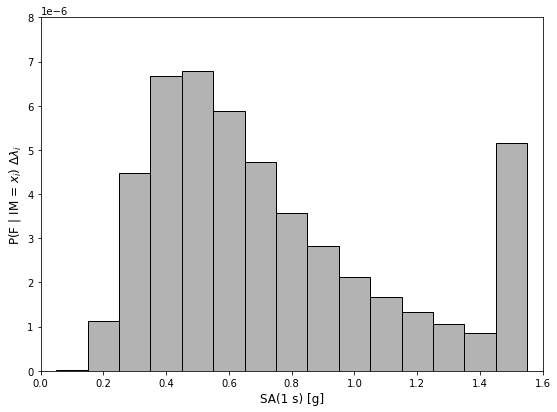

In [4]:
##########################################
### Discretize down for tabular output ###
##########################################

xShort = [0.001, 0.01] + (np.arange(1, 16)/10).tolist()

interpF = interp1d(x,lambdaIM) 
lambdaShort = interpF(xShort)

dLambdaShort =  np.abs(np.diff(lambdaShort).tolist() + [lambdaShort[-1]])  # derivative of hazard curve
pFailShort =  norm.cdf(np.log(xShort), np.log(thetaIM), betaIM)
pFail2Short = norm.cdf(np.log(xShort), np.log(thetaIM2), betaIM)

failRate = np.sum(pFailShort * dLambdaShort)
failRate2 = np.sum(pFail2Short * dLambdaShort)
failRateRatio = failRate2 / failRate

# Plot Fig 9.8
plt.figure(3)
plt.figure(figsize=(9, 6.5))

plt.bar(xShort, pFailShort * dLambdaShort, width=0.1, edgecolor='k', color=[0.7, 0.7, 0.7]) 

plt.xlabel('SA(1 s) [g]', fontsize = 12)
plt.ylabel('P(F | IM = $x_i$) $\Delta\lambda_i$', fontsize = 12)
plt.xlim(0, 1.6)
plt.ylim(0, 8e-6)
